In [10]:
import hoomd
import hoomd.md

In [11]:
hoomd.context.initialize("");

In [12]:
hoomd.init.create_lattice(unitcell=hoomd.lattice.bcc(a=2.0), n=5);

notice(2): Group "all" created containing 250 particles


In [13]:
nl = hoomd.md.nlist.cell();

In [14]:
lj = hoomd.md.pair.lj(r_cut=2.5, nlist=nl);

In [15]:
lj.pair_coeff.set('A', 'A', epsilon=1.0, sigma=1.0);

In [16]:
hoomd.md.integrate.mode_standard(dt=0.005);

In [17]:
all = hoomd.group.all();
hoomd.md.integrate.langevin(group=all, kT=0.2, seed=42);

notice(2): integrate.langevin/bd is using specified gamma values


In [18]:
hoomd.analyze.log(filename="log-output.log",
                  quantities=['potential_energy', 'temperature'],
                  period=100,
                  overwrite=True);

In [19]:
hoomd.dump.gsd("trajectory.gsd", period=2e3, group=all, overwrite=True);

In [20]:
hoomd.run(1e4);

notice(2): -- Neighborlist exclusion statistics -- :
notice(2): Particles with 0 exclusions             : 250
notice(2): Neighbors included by diameter          : no
notice(2): Neighbors excluded when in the same body: no
** starting run **
Time 00:00:42 | Step 10000 / 10000 | TPS 1490.94 | ETA 00:00:00
Average TPS: 1490.41
---------
-- Neighborlist stats:
334 normal updates / 100 forced updates / 0 dangerous updates
n_neigh_min: 0 / n_neigh_max: 87 / n_neigh_avg: 26.844
shortest rebuild period: 15
-- Cell list stats:
Dimension: 3, 3, 3
n_min    : 0 / n_max: 35 / n_avg: 9.25926
** run complete **


In [21]:
import numpy
from matplotlib import pyplot
%matplotlib inline
data = numpy.genfromtxt(fname='log-output.log', skip_header=True);

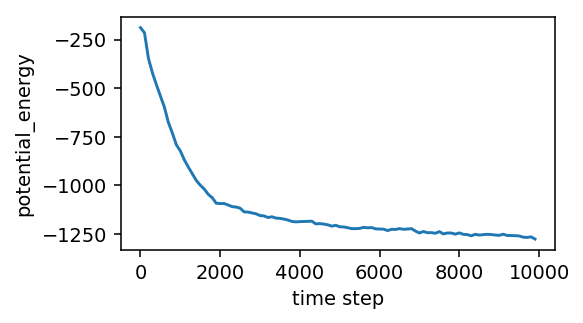

In [22]:
pyplot.figure(figsize=(4,2.2), dpi=140);
pyplot.plot(data[:,0], data[:,1]);
pyplot.xlabel('time step');
pyplot.ylabel('potential_energy');

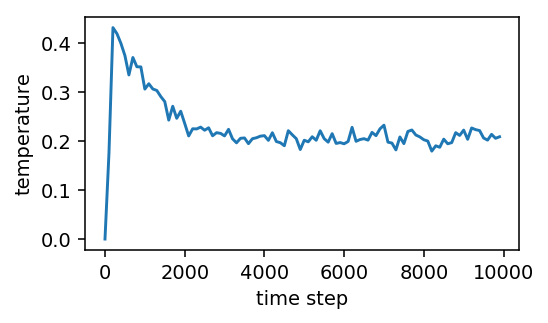

In [23]:
pyplot.figure(figsize=(4,2.2), dpi=140);
pyplot.plot(data[:,0], data[:,2]);
pyplot.xlabel('time step');
pyplot.ylabel('temperature');

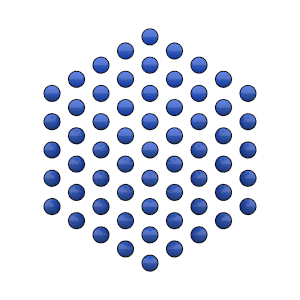

In [24]:
import ex_render
ex_render.display_movie(ex_render.render_sphere_frame, 'trajectory.gsd');